#새로운 feature로 시도

In [2532]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2533]:
import pandas as pd
import numpy as np

In [2534]:
path1='/content/drive/Shareddrives/데이터 청년 캠퍼스/젓가락질 데이터/새 젓가락질 데이터/excel 파일/lstm/data0826.xlsx'

In [2535]:
data= pd.read_excel(path1)

In [2536]:
data.columns

Index(['x_1-0', 'y_1-0', 'x_2-1', 'y_2-1', 'x_3-2', 'y_3-2', 'x_4-3', 'y_4-3',
       'x_5-4', 'y_5-4', 'x_6-5', 'y_6-5', 'x_7-6', 'y_7-6', 'x_8-7', 'y_8-7',
       'x_9-8', 'y_9-8', 'x_10-9', 'y_10-9', 'x_11-10', 'y_11-10', 'x_12-11',
       'y_12-11', 'x_13-12', 'y_13-12', 'x_14-13', 'y_14-13', 'x_15-14',
       'y_15-14', 'x_16-15', 'y_16-15', 'd_ratio', 'd_ratio_sq', 'sin dif',
       '엄지 중지 내적', '검지 중지 내적', 'y', 'id', 'time'],
      dtype='object')

In [2537]:
#data.drop(['엄지 중지 내적', '검지 중지 내적'],axis=1, inplace=True)
#y_15-14
#y_9-8, y_1-0, y_12-11
#x_8-7, y_8-7
#x_7-6, y_7-6
#x_6-5,y_6-5
#d_ratio. x_1-0. y_3-2. x_11-10. x_12-11. x_13-12. x_14-13. y_14-13. x_16-15

#LSTM

train-test 데이터셋 분리

In [2538]:
vector0 = data[data["y"]==0].sort_values(by=['id','time'])
vector0.reset_index(drop=True, inplace=True)
vector0.drop(['y'],axis=1, inplace=True)

In [2539]:
vector1 = data[data["y"]==1].sort_values(by=['id','time'])
vector1.reset_index(drop=True, inplace=True)
vector1.drop(['y'],axis=1, inplace=True)

In [2540]:
vector1[vector1.id == 45].index[0]

1024

In [2541]:
x0_test = vector0
x1_train = vector1[:1024]
x1_test = vector1[1024:]

In [2542]:
len(x1_train)

1024

In [2543]:
len(x1_test)

352

test-valid

In [2544]:
len(x0_test)

416

In [2545]:
#x0_test[x0_test.id == 8].index[0]

In [2546]:
#x0_test_ = x0_test[:256]
#x0_valid = x0_test[256:]

In [2547]:
#len(x0_test_), len(x0_valid)

In [2548]:
#x1_test[x1_test.id == 47].index[0]

In [2549]:
#x1_test_ = x1_test.loc[:1119]
#x1_valid = x1_test.loc[1120:]

In [2550]:
#len(x1_test_), len(x1_valid)

In [2551]:
x1_train = np.array(x1_train)

In [2552]:
#x0_test_ = np.array(x0_test_)
#x1_test_ = np.array(x1_test_)
#x0_valid = np.array(x0_valid)
#x1_valid = np.array(x1_valid)

비정상 :1, 정상: 0 으로 testset 구성

In [2553]:
#x0_test_tot = np.hstack((x0_test_, np.ones(x0_test_.shape[0]).reshape(-1,1)))
#x1_test_tot = np.hstack((x1_test_, np.zeros(x1_test_.shape[0]).reshape(-1,1)))
#test = np.vstack((x0_test_tot, x1_test_tot))

In [2554]:
#x0_valid_tot = np.hstack((x0_valid, np.ones(x0_valid.shape[0]).reshape(-1,1)))
#x1_valid_tot = np.hstack((x1_valid, np.zeros(x1_valid.shape[0]).reshape(-1,1)))
#valid = np.vstack((x0_valid_tot, x1_valid_tot))

In [2555]:
#x1_train = x1_train[:,:-2]
##x_test = test[:,:-3]
#x_valid = test[:,:-3]
#y_test = test[:,-1]
##x_valid = valid[:,:-3]
#x_test = valid[:,:-3]
#y_valid = valid[:,-1]

##수정

In [2556]:
x0_test = np.array(x0_test)
x1_test = np.array(x1_test)

In [2557]:
x00_test_tot = np.hstack((x0_test, np.ones(x0_test.shape[0]).reshape(-1,1)))
x11_test_tot = np.hstack((x1_test, np.zeros(x1_test.shape[0]).reshape(-1,1)))
test = np.vstack((x00_test_tot, x11_test_tot))

In [2558]:
x1_train = x1_train[:,:-2]
x_test = test[:,:-3]
y_test = test[:,-1]

In [2559]:
#print(x1_train.shape,x_test.shape,x_valid.shape)
print(x1_train.shape,x_test.shape)

(1024, 37) (768, 37)


In [2560]:
import tensorflow as tf

In [2561]:
x1_train=tf.reshape(x1_train,[-1, 32, x1_train.shape[1]]) # 마지막은 열 개수
print(x1_train.shape)

x_test=tf.reshape(x_test,[-1, 32, x_test.shape[1]]) # 마지막은 열 개수
print(x_test.shape)

#x_valid=tf.reshape(x_valid,[-1, 32, 33]) # 마지막은 열 개수
#print(x_valid.shape)

(32, 32, 37)
(24, 32, 37)


In [2562]:
#y_test = np.array([1,1,1,1,1,1,1,1,0,0,0,0])
#y_valid = np.array([1,1,1,1,0,0,0,0,0])

In [2563]:
#y_valid = np.array([1,1,1,1,1,1,1,1,0,0,0,0])
#y_test = np.array([1,1,1,1,0,0,0,0,0])

In [2564]:
#y_test = [1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0]

신경망 구축

In [2565]:
from keras import regularizers
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector

In [2566]:
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2])) #개수, 열
    # return_sequences 가 True면 각 time_steps의 셀이 모두 출력으로 내보냄 , False 면 최종 셀만 출력으로 내보냄
    L1 = LSTM(140, activation='relu', return_sequences=True, 
              kernel_regularizer=regularizers.l2(0.00))(inputs)
    L2 = LSTM(70, activation='relu', return_sequences=False)(L1)
    L3 = RepeatVector(X.shape[1])(L2)
    L4 = LSTM(70, activation='relu', return_sequences=True)(L3)
    L5 = LSTM(140, activation='relu', return_sequences=True)(L4)
    output = TimeDistributed(Dense(X.shape[2]))(L5)    
    model = Model(inputs=inputs, outputs=output)
    return model

In [2567]:
model = autoencoder_model(x1_train)
model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "model_108"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_109 (InputLayer)       [(None, 32, 37)]          0         
_________________________________________________________________
lstm_432 (LSTM)              (None, 32, 140)           99680     
_________________________________________________________________
lstm_433 (LSTM)              (None, 70)                59080     
_________________________________________________________________
repeat_vector_108 (RepeatVec (None, 32, 70)            0         
_________________________________________________________________
lstm_434 (LSTM)              (None, 32, 70)            39480     
_________________________________________________________________
lstm_435 (LSTM)              (None, 32, 140)           118160    
_________________________________________________________________
time_distributed_108 (TimeDi (None, 32, 37)            52

In [2568]:
model = autoencoder_model(x1_train)
model.compile(optimizer='adam',loss='mse')

In [2569]:
epochs=100
batch_size=10
callbacks=[EarlyStopping(monitor='val_loss',patience=5)]
history = model.fit(x1_train, x1_train, epochs=epochs, batch_size= batch_size,callbacks = callbacks, validation_split=0.05).history

Epoch 1/100
3/3 [==============================] - 4s 407ms/step - loss: 46.7305 - val_loss: 2.7297
Epoch 2/100
3/3 [==============================] - 0s 103ms/step - loss: 326.8183 - val_loss: 2.7489
Epoch 3/100
3/3 [==============================] - 0s 104ms/step - loss: 21.2934 - val_loss: 2.6598
Epoch 4/100
3/3 [==============================] - 0s 108ms/step - loss: 267.5640 - val_loss: 2.4842
Epoch 5/100
3/3 [==============================] - 0s 119ms/step - loss: 1814.0380 - val_loss: 319.2973
Epoch 6/100
3/3 [==============================] - 0s 123ms/step - loss: 1242.0765 - val_loss: 6286.2275
Epoch 7/100
3/3 [==============================] - 0s 145ms/step - loss: 4382.5449 - val_loss: 2042.6411
Epoch 8/100
3/3 [==============================] - 0s 140ms/step - loss: 9342.9941 - val_loss: 13057.4062
Epoch 9/100
3/3 [==============================] - 0s 133ms/step - loss: 5669.9141 - val_loss: 395.8263


In [2570]:
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

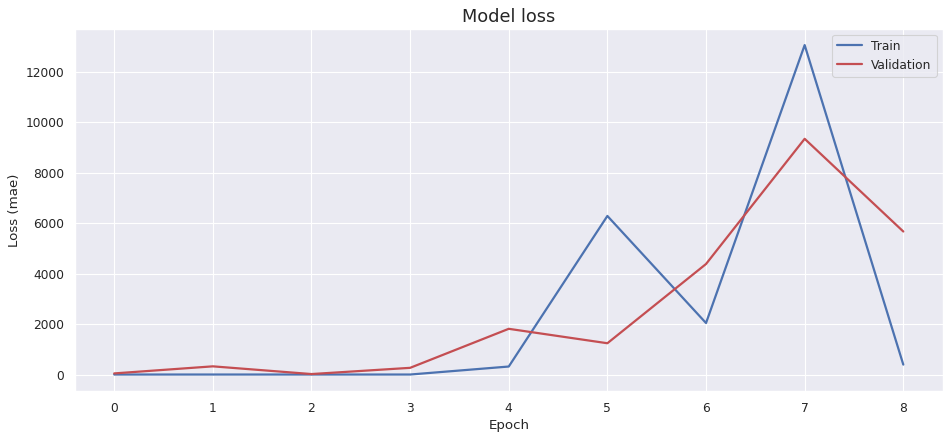

In [2571]:
# 학습 손실 시각화
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history['val_loss'], 'b', label='Train', linewidth=2)
ax.plot(history['loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

validation

In [2572]:
from sklearn import metrics

In [2573]:
#x_valid.shape

     Reconstruction_error  True_class
0                1.757928         1.0
1                2.366363         1.0
2                2.283771         1.0
3                2.568606         1.0
4                2.493862         1.0
..                    ...         ...
763              0.793305         0.0
764              0.909499         0.0
765              0.677776         0.0
766              0.796127         0.0
767              0.817084         0.0

[768 rows x 2 columns]
302
precision:  0.6875 , recall:  0.6875
threshold:  2.1460068696760657


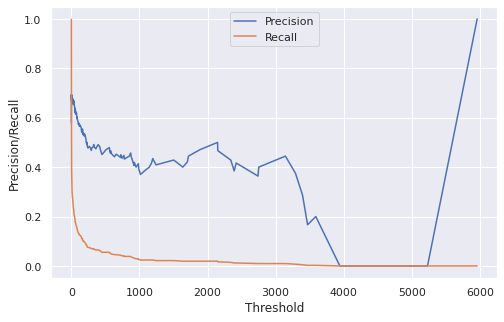

In [2574]:
#검증 데이터 입력
#predictions_3d = model.predict(x_valid)
#predictions = predictions_3d.reshape(predictions_3d.shape[0]*predictions_3d.shape[1], predictions_3d.shape[2])
#x_valid_ = np.array(x_valid).reshape(x_valid.shape[0]*x_valid.shape[1], x_valid.shape[2])

#재구성 손실 값 도출
#mse = np.mean(np.power(x_valid_ - predictions, 2), axis = 1)
#mse = np.mean(np.mean(np.power(x_valid - predictions_3d, 2), axis=1)**(1/2), axis=1)**(1/2)
#error_df = pd.DataFrame({'Reconstruction_error':mse, 'True_class': y_valid})


#predictions_3d = model.predict(x_test)
#mse = np.mean(np.mean(np.power(x_test - predictions_3d, 2), axis=1)**(1/3), axis=1)**(1/3)
#error_df = pd.DataFrame({'Reconstruction_error':mse, 'True_class': y_test})


test_predictions_3d = model.predict(x_test)
test_predictions = test_predictions_3d.reshape(test_predictions_3d.shape[0]*test_predictions_3d.shape[1], test_predictions_3d.shape[2])
x_test_ = np.array(x_test).reshape(x_test.shape[0]*x_test.shape[1], x_test.shape[2])
mse = np.mean(np.power(x_test_ - test_predictions, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error':mse, 'True_class': y_test})

print(error_df)

precision_rt, recall_rt, threshold_rt = metrics.precision_recall_curve(error_df['True_class'], error_df['Reconstruction_error']) ##auc curve 사용 말고 다른 방법

#모델 최적의 threshold 값 찾기
best_cnt_dic = abs(precision_rt - recall_rt)
threshold_fixed = threshold_rt[np.argmin(best_cnt_dic)]  #둘의 차가 최소가 될때가 threshold

print(np.argmin(best_cnt_dic))
print('precision: ', precision_rt[np.argmin(best_cnt_dic)], ', recall: ', recall_rt[np.argmin(best_cnt_dic)])
print('threshold: ', threshold_fixed)

plt.figure(figsize=(8,5))
plt.plot(threshold_rt, precision_rt[1:], label = 'Precision')
plt.plot(threshold_rt, recall_rt[1:], label = 'Recall')
plt.xlabel('Threshold'); plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

모델 성능 평가

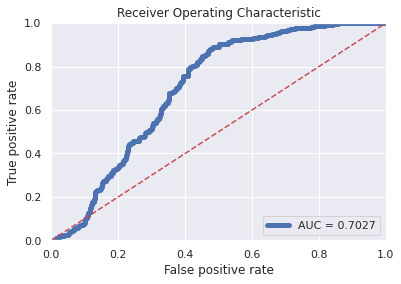

In [2575]:
from sklearn.metrics import roc_curve, auc

#fpr, tpr, thresholds = roc_curve(y_valid, mse)

fpr, tpr, thresholds = roc_curve(y_test, mse)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label = 'AUC = %0.4f' % roc_auc, linewidth=5)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1],'r--')
plt.xlim([-0.001,1])
plt.ylim([0,1.001])
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

prediction

     Reconstruction_error  True_class
0                1.757928         1.0
1                2.366363         1.0
2                2.283771         1.0
3                2.568606         1.0
4                2.493862         1.0
..                    ...         ...
763              0.793305         0.0
764              0.909499         0.0
765              0.677776         0.0
766              0.796127         0.0
767              0.817084         0.0

[768 rows x 2 columns]
accuracy:  [0.66276042]


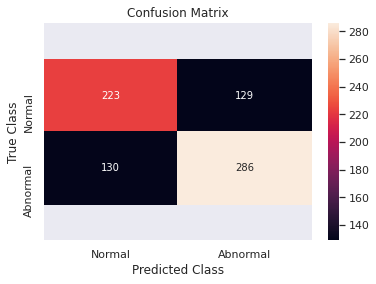

In [2576]:
test_predictions_3d = model.predict(x_test)

test_predictions = test_predictions_3d.reshape(test_predictions_3d.shape[0]*test_predictions_3d.shape[1], test_predictions_3d.shape[2])
x_test_ = np.array(x_test).reshape(x_test.shape[0]*x_test.shape[1], x_test.shape[2])
mse = np.mean(np.power(x_test_ - test_predictions, 2), axis=1)

#mse = np.mean(np.mean(np.power(x_test - test_predictions_3d, 2), axis=1)**(1/2), axis=1)**(1/2)

error_df = pd.DataFrame({'Reconstruction_error': mse, 'True_class': y_test})
print(error_df)

pred_y = [1 if e > threshold_fixed else 0 for e in error_df['Reconstruction_error'].values]
conf_matrix = metrics.confusion_matrix(error_df['True_class'], pred_y)

accuracy = (conf_matrix[0][0]+ conf_matrix[1][[1]])/conf_matrix.sum()
print('accuracy: ',accuracy)

sns.heatmap(conf_matrix, xticklabels=['Normal','Abnormal'], yticklabels=['Normal', 'Abnormal'], annot=True, fmt='d', annot_kws={'size':10})
b,t = plt.ylim()
b+=0.5
t-=0.5
plt.ylim(b,t)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class'); plt.ylabel('True Class')
plt.show()

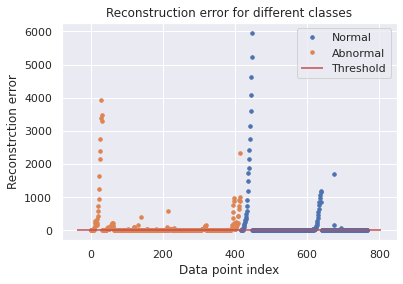

In [2577]:
groups = error_df.groupby('True_class')
fig, ax = plt.subplots()

for name, group in groups:
  ax.plot(group.index, group.Reconstruction_error, marker = 'o', ms=3.5, linestyle='',
          label='Abnormal' if name ==1 else 'Normal')

ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors ='r', zorder=100, label ='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")  
plt.ylabel("Reconstrction error")
plt.xlabel("Data point index")
plt.show()

##모델 저장

In [2578]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpezjn518a/assets


In [2580]:
#저장
open('converted_model.tflite', 'wb').write(tflite_model)

1359496